In [2]:
import matplotlib.pyplot as plt
import numpy as np

Standard deviation in components of total momentum is [2.05366588e-13 1.93600692e-11 2.62939753e-11]


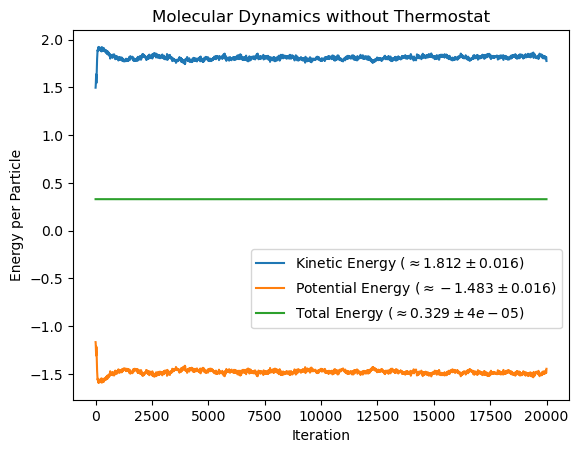

In [59]:
KE = np.loadtxt('data/2/KE.dat') / 2197
PE = np.loadtxt('data/2/PE.dat') / 2197
E = KE + PE
momentum = np.loadtxt('data/2/momentum.dat')

print(f"Standard deviation in components of total momentum is {np.std(momentum, 0)}")

plt.plot(KE)
plt.plot(PE)
plt.plot(E)
plt.xlabel("Iteration")
plt.ylabel("Energy per Particle")
plt.legend([
    f'Kinetic Energy ($\\approx {round(np.average(KE[10000:]), 3)} \pm {round(np.std(KE[10000:]), 3)}$)',
    f'Potential Energy ($\\approx {round(np.average(PE[10000:]), 3)} \pm {round(np.std(PE[10000:]), 3)}$)',
    f'Total Energy ($\\approx {round(np.average(E), 3)} \pm {round(np.std(E), 5)}$)'
    ], loc="center right", bbox_to_anchor=(1,0.3))
plt.title(f"Molecular Dynamics without Thermostat")
plt.show()

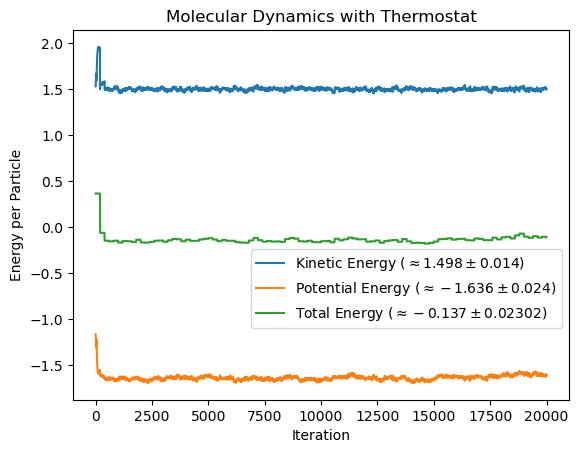

In [61]:
KE = np.loadtxt('data/3/KE.dat') / 2197
PE = np.loadtxt('data/3/PE.dat') / 2197
E = KE + PE

plt.plot(KE)
plt.plot(PE)
plt.plot(E)
plt.xlabel("Iteration")
plt.ylabel("Energy per Particle")
plt.legend([
    f'Kinetic Energy ($\\approx {round(np.average(KE[10000:]), 3)} \pm {round(np.std(KE[10000:]), 3)}$)',
    f'Potential Energy ($\\approx {round(np.average(PE[10000:]), 3)} \pm {round(np.std(PE[10000:]), 3)}$)',
    f'Total Energy ($\\approx {round(np.average(E[10000:]), 3)} \pm {round(np.std(E[10000:]), 5)}$)'
    ], loc="center right", bbox_to_anchor=(1,0.3))
plt.title(f"Molecular Dynamics with Thermostat")
plt.show()